In [6]:
"""
Assignment 5
Submit Assignment
A biometrics database contains height and handspan measurements collected from a large number of individuals.
 Presumably, that population consists of adult females, adult males and children. 
 The class labels have not been provided in the database. The database is attached.
1.	Use the Expectation Maximization algorithm to figure out the class (F, M, or C) of each sample. 
Note: You may use a module such as scikit-learn. You do not need to implement the algorithm from scratch
2.	Estimate the confidence of each prediction by computing the posterior probability
3.	Estimate the number of adult females, adult males and children in the population
Assignment_5_Data_and_Template.xlsx 

"""

'\nAssignment 5\nSubmit Assignment\nA biometrics database contains height and handspan measurements collected from a large number of individuals.\n Presumably, that population consists of adult females, adult males and children. \n The class labels have not been provided in the database. The database is attached.\n1.\tUse the Expectation Maximization algorithm to figure out the class (F, M, or C) of each sample. \nNote: You may use a module such as scikit-learn. You do not need to implement the algorithm from scratch\n2.\tEstimate the confidence of each prediction by computing the posterior probability\n3.\tEstimate the number of adult females, adult males and children in the population\nAssignment_5_Data_and_Template.xlsx \n\n'

[[  9.99784151e-01   2.15849003e-04   3.35546140e-10]
 [  8.32161958e-11   1.86039019e-04   9.99813961e-01]
 [  5.56941084e-11   1.49185385e-05   9.99985081e-01]
 ..., 
 [  9.17149741e-01   8.28492129e-02   1.04648866e-06]
 [  9.89922164e-01   1.00712042e-02   6.63193307e-06]
 [  2.30198002e-04   4.98001909e-03   9.94789783e-01]]


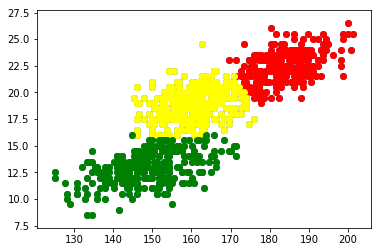

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture

def getSheetNames(excelfile):
    from pandas import ExcelFile
    return (ExcelFile(excelfile)).sheet_names

def readExcelSheet1(excelfile):
    from pandas import read_excel
    return (read_excel(excelfile)).values

def readExcelRange(excelfile, sheetname="Sheet1", startrow=1, endrow=1, startcol=1, endcol=1):
    from pandas import read_excel
    values = (read_excel(excelfile, sheetname, header=None)).values;
    return values[startrow - 1:endrow, startcol - 1:endcol]

def readExcel(excelfile, **args):
    if args:
        data = readExcelRange(excelfile, **args)
    else:
        data = readExcelSheet1(excelfile)
    if data.shape == (1, 1):
        return data[0, 0]
    elif (data.shape)[0] == 1:
        return data[0]
    else:
        return data
def writeExcelData(x, excelfile, sheetname, startrow, startcol, reshape=None):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    if reshape:
        df = DataFrame(x.reshape(-1, len(x)))
    else:
        df = DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl')
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname, startrow=startrow - 1, startcol=startcol - 1, header=False, index=False)
    writer.save()
    writer.close()


excelfile = r"/Users/omerorhan/Desktop/UCSC/MachineLearning/Assignments/venv/notebookfiles/" \
            r"Assignment#5/Assignment_5_Data_and_Template.xlsx";
sheets = getSheetNames(excelfile)
sheets

dataset = readExcel(excelfile)

data = dataset
data[:, 0] = data[:, 0] * 2.54

plt.scatter(data[:, 0], data[:, 1])
gmm = GaussianMixture(n_components=3, random_state=0, covariance_type="full", max_iter=100, n_init=100, 
                      init_params="kmeans")

gmm.fit(data)

probs = gmm.predict_proba(data)
print(probs)
labels = gmm.predict(data)

labels = DataFrame(labels)
labels[labels == 0] = "F"
labels[labels == 1] = "M"
labels[labels == 2] = "C"
male = "M"
female = "F"
child = "C"
writeExcelData(labels, excelfile, "Results", 2, 1)
writeExcelData([labels[labels == "M"].count()], excelfile, "Results", 2, 6)
writeExcelData([labels[labels == "F"].count()], excelfile, "Results", 3, 6)
writeExcelData([labels[labels == "C"].count()], excelfile, "Results", 4, 6)

d = DataFrame(data)
d['labels'] = labels
d0 = d[d['labels'] == "C"]
d1 = d[d['labels'] == "M"]
d2 = d[d['labels'] == "F"]

# plot three clusters in same plot 
plt.scatter(d0[0], d0[1], c='r')
plt.scatter(d1[0], d1[1], c='yellow')
plt.scatter(d2[0], d2[1], c='g')


In [7]:
problbl = np.zeros((labels.shape[0]))

N = labels.shape[0]
print(labels[0][0])

for i in range(N):
    if labels[0][i] == male:
        problbl[i] = probs[i, 1] * 100
    elif labels[0][i] == female:
        problbl[i] = probs[i, 0] * 100
    else:
        problbl[i] = probs[i, 2] * 100

writeExcelData(problbl, excelfile, 'Results', 2, 2)


F
